In [1]:

import numpy as np 
import pandas as pd 
import os
import time
import cv2
import glob
import torch 
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
print(os.listdir("../input"))

['test set', 'flower_data', 'cat_to_name.json']


In [2]:
labels= pd.read_json("../input/cat_to_name.json", typ='series')
print("No of Flower Labels : "+str(len(labels)))
all_labels=[]
for i in range(len(labels)):
    all_labels.append(labels[i+1])
print(all_labels)

No of Flower Labels : 102
['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 

In [3]:
labels.head(10)

21                   fire lily
3             canterbury bells
45            bolero deep blue
1                pink primrose
34               mexican aster
27    prince of wales feathers
7                  moon orchid
16                globe-flower
25              grape hyacinth
26                  corn poppy
dtype: object

In [4]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

data_dir='../input/flower_data/flower_data'

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)
test_data = datasets.ImageFolder('../input/test set/', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)

In [5]:
def get_unique_data():
    unique_images=[]
    unique_labels=[]
    for image,label in train_data:
        if label not in unique_labels:
            unique_images.append(image)
            unique_labels.append(label)
    return unique_images,unique_labels

labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


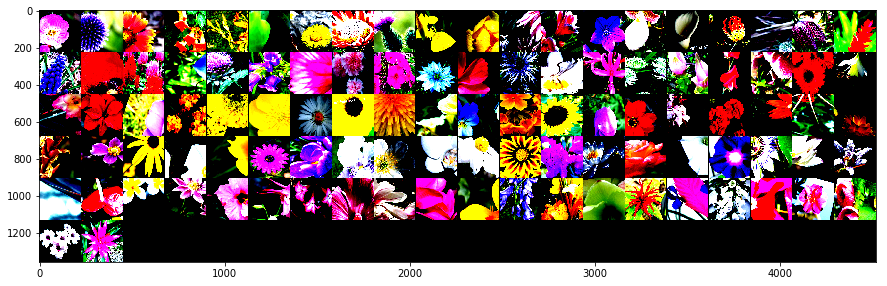

In [6]:
import torchvision
unique_images,unique_labels=get_unique_data()
grid=torchvision.utils.make_grid(unique_images,nrow=20, padding=2)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:',unique_labels)

In [7]:
image_path=data_dir+"/train/1/image_06745.jpg"
image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
print(image.shape)

(500, 609, 3)


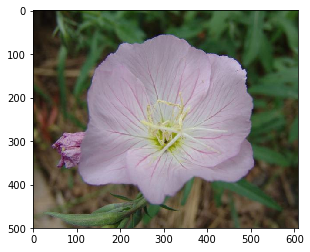

In [8]:
plt.imshow(image)

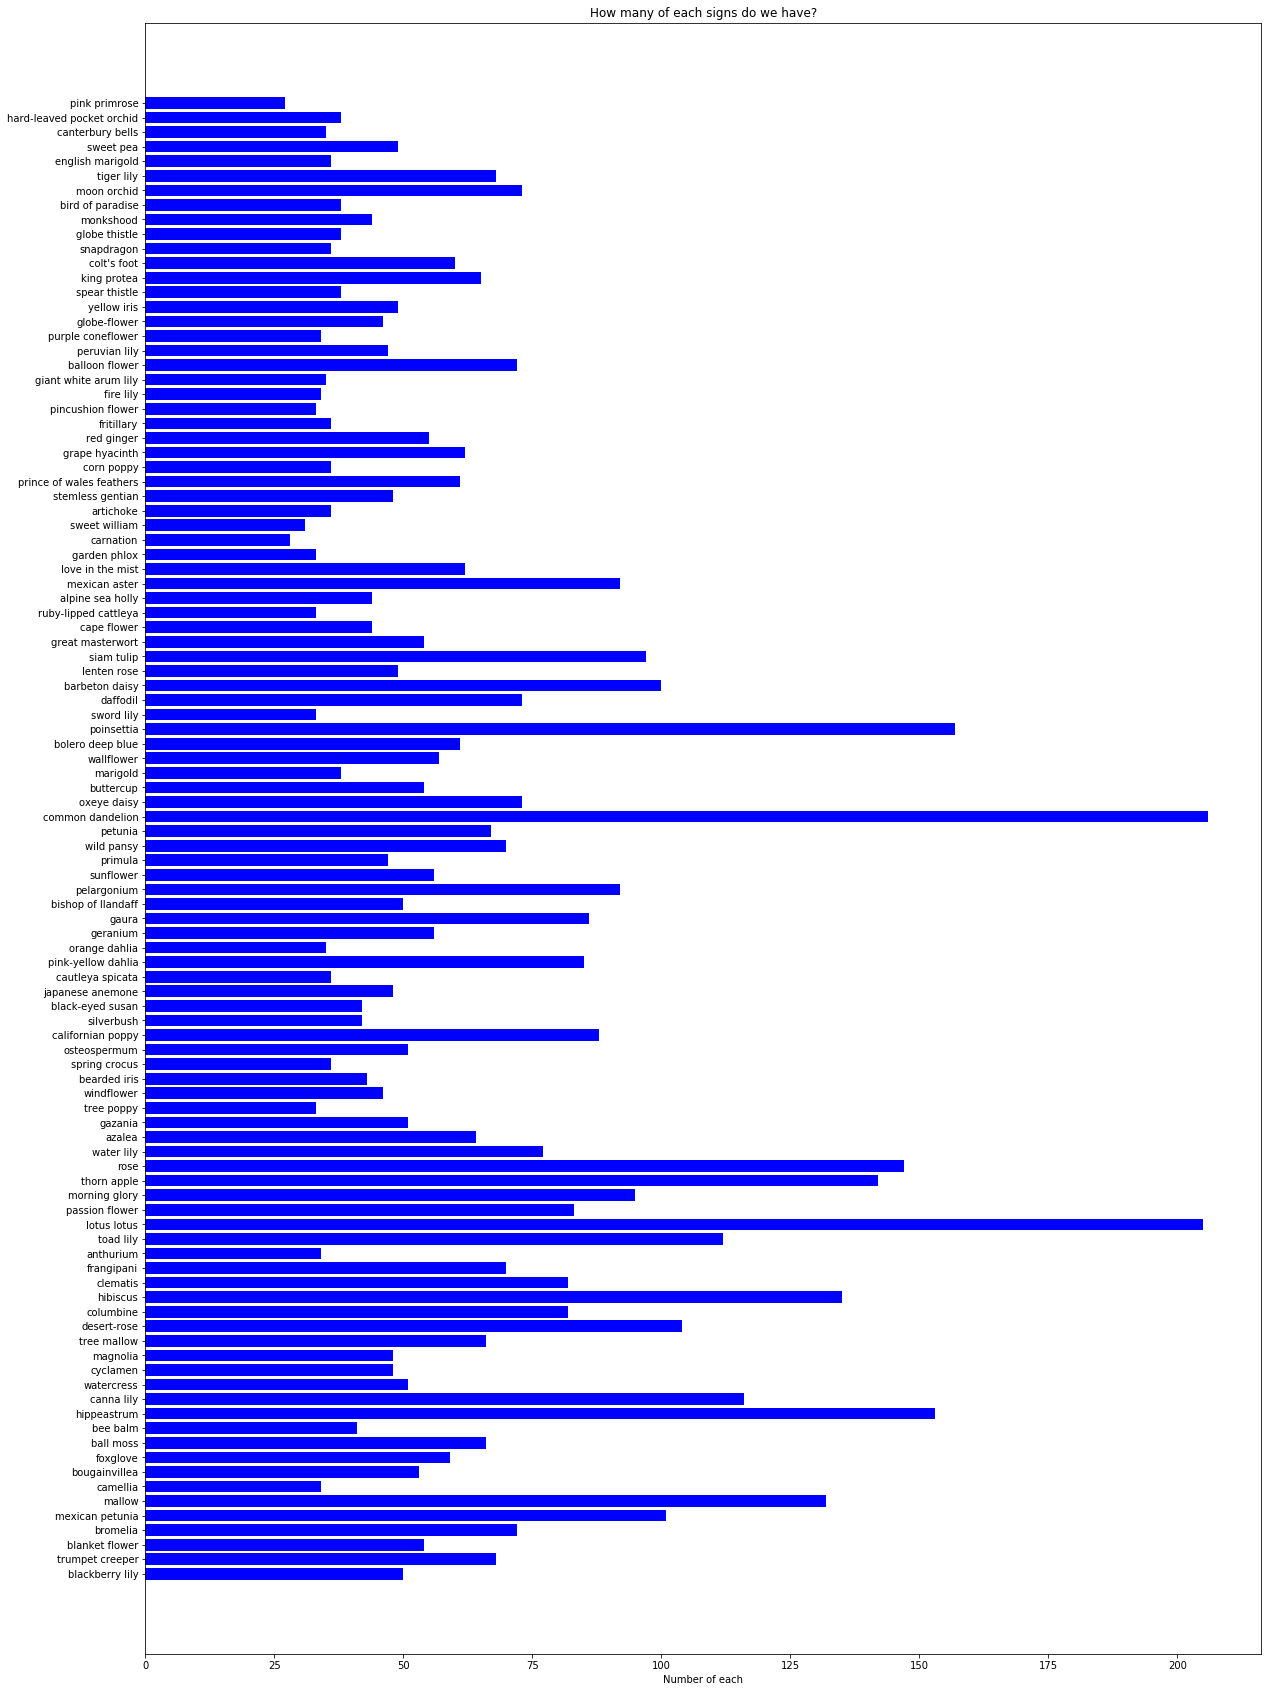

In [9]:
#Show number of images per label
fig, ax = plt.subplots(figsize=(20, 30))

unique, numOfEach = np.unique(train_data.targets, return_counts=True)
ax.barh(labels, numOfEach, align='center', color='blue')
ax.set_yticklabels(all_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of each')
ax.set_title('How many of each signs do we have?')

plt.show()

In [10]:
model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /tmp/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 144393273.95it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [11]:
from torch import nn
from torch import optim
import torch.nn.functional as F

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.Linear(256, 102))

criterion = nn.CrossEntropyLoss() # defining loss function


optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.to(device);

cuda


In [12]:
def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()
    i=0
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                #scheduler.step()
                model.train(True)
                dataloader=trainloader# Set model to training mode
            else:
                model.train(False)
                dataloader=validloader# Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloader:
                # get the inputs
                inputs, labels = data

                inputs=inputs.to(device)
                labels=labels.to(device)
        
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss  += loss.item()
                running_corrects += torch.sum(preds == labels.data).item()
                
            if phase=="train":
                epoch_loss = running_loss / len(trainloader)
                epoch_acc = running_corrects / len(train_data)
    
                
            else:
                epoch_loss = running_loss / len(validloader)
                epoch_acc = running_corrects / len(valid_data)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
#             # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
#                 best_model_wts = model.state_dict()
#                 # saving a checkpoint to use for next time to save time used in training from scratch
#                 state = {'model':model.state_dict(),'optim':optimizer.state_dict()}
#                 torch.save(state,'drive/flowers classification/point_resnet_best.pth')

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [13]:
trained_model= train_model(model, criterion, optimizer,num_epochs=20)

Epoch 1/20
----------
train Loss: 4.4486 Acc: 0.0540
valid Loss: 4.2206 Acc: 0.1271
Epoch 2/20
----------
train Loss: 4.1071 Acc: 0.1517
valid Loss: 3.8695 Acc: 0.2286
Epoch 3/20
----------
train Loss: 3.7768 Acc: 0.2396
valid Loss: 3.5123 Acc: 0.3093
Epoch 4/20
----------
train Loss: 3.4588 Acc: 0.3178
valid Loss: 3.1580 Acc: 0.3851
Epoch 5/20
----------
train Loss: 3.1172 Acc: 0.3929
valid Loss: 2.7940 Acc: 0.4621
Epoch 6/20
----------
train Loss: 2.7954 Acc: 0.4603
valid Loss: 2.4698 Acc: 0.5232
Epoch 7/20
----------
train Loss: 2.5123 Acc: 0.5191
valid Loss: 2.1703 Acc: 0.5782
Epoch 8/20
----------
train Loss: 2.2543 Acc: 0.5749
valid Loss: 1.9246 Acc: 0.6406
Epoch 9/20
----------
train Loss: 2.0252 Acc: 0.6219
valid Loss: 1.6903 Acc: 0.7029
Epoch 10/20
----------
train Loss: 1.8366 Acc: 0.6719
valid Loss: 1.5004 Acc: 0.7482
Epoch 11/20
----------
train Loss: 1.6684 Acc: 0.7034
valid Loss: 1.3489 Acc: 0.7885
Epoch 12/20
----------
train Loss: 1.5226 Acc: 0.7390
valid Loss: 1.2039 A

In [14]:
torch.save(model, "../densenet_model.pth")

In [15]:
model = torch.load("../densenet_model.pth")

In [16]:
def get_predictions():
    pred_list=[]
    for image, label in testloader:
        # zero the parameter gradients
        optimizer.zero_grad()
        image=image.to(device)
            # forward
        outputs = model(image)
        _, preds = torch.max(outputs.data, 1)
        pred_list.append(preds.item())
    return pred_list

In [17]:
import os
path='../input/test set/test set'
image_list=os.listdir("../input/test set/test set")

In [18]:
pred_list=get_predictions()
for i in range(len(pred_list)):
    print(pred_list[i], all_labels[pred_list[i]-1], image_list[i])

94 foxglove mhm12.jpg
70 tree poppy mo16.jpg
38 great masterwort ab53.jpeg
72 azalea gc4.jpg
73 water lily ac6.jpg
74 rose au38.jpg
24 red ginger gc2.jpg
76 morning glory aa6.jpg
77 passion flower ac9.jpg
73 water lily ab56.jpg
79 toad lily ab41.jpg
61 cautleya spicata nic20.jpg
81 frangipani au31.jpg
62 japanese anemone gc1.jpg
63 black-eyed susan mhm18.jpg
43 sword lily mhm16.jpg
30 sweet william au47.jpeg
66 osteospermum aa9.jpg
17 purple coneflower au23.jpeg
77 passion flower mo18.jpg
38 great masterwort nic18.jpg
39 siam tulip mo8.jpg
40 lenten rose mhm17.jpg
41 barbeton daisy nic16.jpg
42 daffodil mhm7.jpg
44 poinsettia nic12.jpg
43 sword lily nic13.jpg
45 bolero deep blue au28.jpg
46 wallflower ab50.jpg
48 buttercup au45.jpg
49 oxeye daisy ab57.jpg
50 common dandelion au24.jpeg
51 petunia mo9.jpg
52 wild pansy ab42.jpg
26 corn poppy au35.jpg
54 sunflower mhm1.jpg
55 pelargonium au51.jpeg
87 magnolia mo13.jpg
59 orange dahlia ac1.jpg
59 orange dahlia mhm11.jpg
26 corn poppy mhm19